## Today's Practice Topics
1. ### Data Plotting
2. ### Generating Samples
3. ### Regression (Overfitting, underfitting)
4. ### Data Loading
5. ### Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

### Matplotlib Example

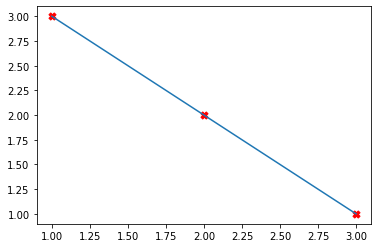

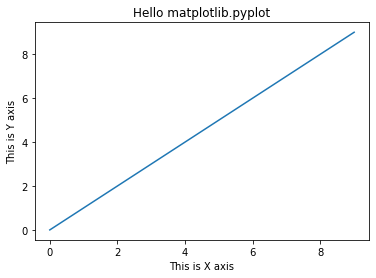

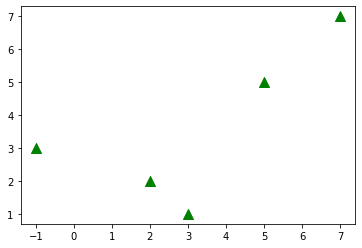

In [22]:
point = np.arange(1,4)

plt.plot(point, point[::-1]) # line
plt.scatter(point, point[::-1], marker="X", c="red", s=50) # point
plt.show()

plt.plot(np.arange(10), np.arange(10))
plt.title("Hello matplotlib.pyplot")
plt.xlabel("This is X axis")
plt.ylabel("This is Y axis")
plt.show()

plt.scatter([-1,2,3,5,7], [3,2,1,5,7], marker="^", c="green", s=100)
plt.show()

In [2]:
def draw_plot(X, Y, x_sample, y_sample):
    for i in range(len(X)):
        plt.plot(X[i], Y[i])
    plt.scatter(x_sample, y_sample, c="red", s=30)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.show()

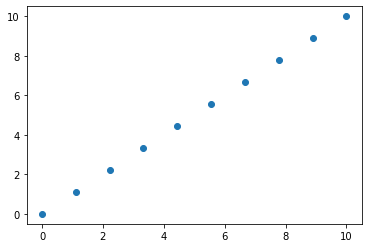

In [3]:
x = np.linspace(0, 10, 10)
y = np.linspace(0, 10, 10)
plt.scatter(x, y)
plt.show()

### Drawing a function

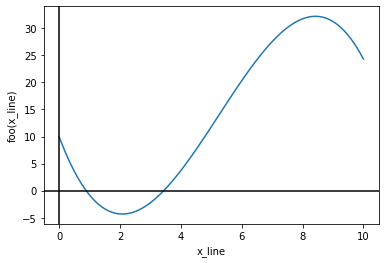

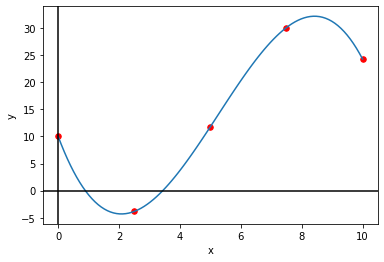

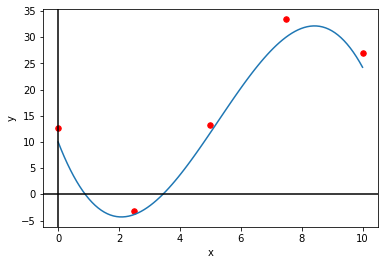

In [23]:
foo = lambda x: -(2/7*x**3-9/2*x**2+15*x-10.)
x_line = np.linspace(0, 10, 100)

# Quiz: Draw the function foo using x_line
Y = foo(x_line)
plt.plot(x_line, Y)
plt.xlabel("x_line")
plt.ylabel("foo(x_line)")
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.show()

# Quiz: Using linspace sample 5 points of foo in the domain [0, 10] and visualize with draw_plot
# domain: x, range: y
x_sample = np.linspace(0, 10, 5)
y_sample = foo(x_sample)
draw_plot([x_line], [Y], x_sample, y_sample)

# Quiz: Sample 5 points of foo in the domain [0, 10] with Gaussian noise where mu=0, sigma=0.1 and visualize.
np.random.seed(0)
num_points = 5
noise = np.random.normal(0, 1.5, num_points)
x_sample = np.linspace(0, 10, num_points)
y_sample = foo(x_sample) + noise
draw_plot([x_line], [Y], x_sample, y_sample)

### Linear Regression

In [26]:
print(x_sample)
print(x_sample[:,None]) # one feature, multiple batches **m x n**
print(x_sample[None,:]) # one batch, multiple features 

print(y_sample) # output for each x - 1D

[ 0.   2.5  5.   7.5 10. ]
[[ 0. ]
 [ 2.5]
 [ 5. ]
 [ 7.5]
 [10. ]]
[[ 0.   2.5  5.   7.5 10. ]]
[12.64607852 -3.2390499  13.25382126 33.45062551 27.08705127]


R^2: 0.527995

Actual y[0]: 12.646078518951496
Prediction y[0]:3.525381148863678

Mean Square Error: 76.87370064238061
*Ideally, should be 0.XX*

Orange line is our linear regression.


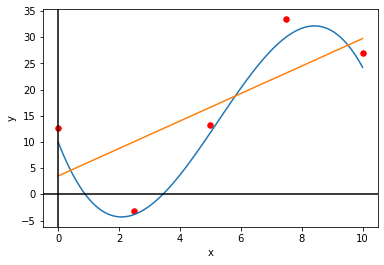

Linear regression is underfitting. High Bias, Low variance.


In [40]:
from sklearn.linear_model import LinearRegression

# Defining a linear regression model.
lr = LinearRegression()
x_new = x_sample[:, None]

# Training the linear regression model.
lr.fit(x_new, y_sample)

# Coefficient of Determination (i.e. R^2, R Squared)
r2 = lr.score(x_new, y_sample)
print("R^2: %f\n" % r2)

# Predicting a single data point.
y_hat_0 = lr.predict(x_new[0, None])
print(f"Actual y[0]: {y_sample[0]}\nPrediction y[0]:{y_hat_0[0]}\n")

# Quiz: Calculate Mean Squared Error using x_sample and y_sample and lr.predict()
y_hat = lr.predict(x_new)
MSE = np.mean((y_hat - y_sample)**2)
print(f"Mean Square Error: {MSE}\n*Ideally, should be 0.XX*\n")

# Quiz: Use x_line, lr.predict() and draw_plot to visualize the linear regression model,
#       in comparison with the original function foo.
print("Orange line is our linear regression.")
draw_plot([x_line, x_new], [Y, y_hat], x_sample, y_sample)
print("Linear regression is underfitting. High Bias, Low variance.")

### Polynomial Regression

Before transform: (Single features)
[[ 0. ]
 [ 2.5]
 [ 5. ]
 [ 7.5]
 [10. ]]

After transform: (Multiple features)
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 2.5000000e+00 6.2500000e+00 1.5625000e+01 3.9062500e+01]
 [1.0000000e+00 5.0000000e+00 2.5000000e+01 1.2500000e+02 6.2500000e+02]
 [1.0000000e+00 7.5000000e+00 5.6250000e+01 4.2187500e+02 3.1640625e+03]
 [1.0000000e+00 1.0000000e+01 1.0000000e+02 1.0000000e+03 1.0000000e+04]]



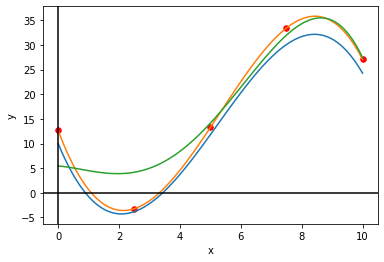

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import operator

# Defining a polynomial feature transformer.
poly = PolynomialFeatures(degree=4)
x_new = x_sample[:, None]

# Transform the original features to polynomial features.
x_sample_poly = poly.fit_transform(x_new)
print(f"Before transform: (Single features)\n{x_new}\n")
print(f"After transform: (Multiple features)\n{x_sample_poly}\n")

# Train a linear regression model using the polynomial features.
poly_lr = LinearRegression().fit(x_sample_poly, y_sample)
rr = Ridge(alpha=30.0).fit(x_sample_poly, y_sample)

# Quiz: Visualize the polynomial regression model, in comparison with foo.
# Transform the original x_line to poly first
x_line_poly = poly.fit_transform(x_line[:, None])

# Feed the data into polynomial linear regression
y_poly = poly_lr.predict(x_line_poly)
y_poly_rr = rr.predict(x_line_poly)

draw_plot([x_line, x_line, x_line], [Y, y_poly, y_poly_rr], x_sample, y_sample)

# Quiz: What happens if you increase/decrease the degree of the polynomial?

### Iris Dataset

In [2]:
from sklearn import datasets
import numpy as np

iris_X, iris_Y = datasets.load_digits(return_X_y=True)
print(f"m:\n{iris_X.shape[0]}\n")
print(f"number of features:\n{iris_X.shape[1]}\n")
print(f"number of classes:\n{np.unique(iris_Y)}\n")
X = np.array(iris_X)
y = np.array(iris_Y)

# data_path = './iris.data'
# X = []
# y = []
# with open(data_path, 'r') as fid:
#     count = 0
#     for line in fid:
#         print(line.strip())

# X = np.array(X)
# y = np.array(y)

# Quiz: Fill the above for loop to load the data into X and y.

m:
1797

number of features:
64

number of classes:
[0 1 2 3 4 5 6 7 8 9]



### Train Test Split
Split dataset to iid

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Classifiers

In [122]:
from sklearn.linear_model import LogisticRegression

# random_state simply sets a seed to the random generator, 
# so that your train-test splits are always deterministic
logistic = LogisticRegression(random_state=1234)
logistic.fit(X_train[:, :2], y_train)

# Quiz: Import Support Vector Machine, then train SVM
from sklearn import svm
svc = svm.SVC(kernel="linear", random_state=1234)
svc.fit(X_train[:, :2], y_train)

# Quiz: Import Decision Tree, then train DT
from sklearn import tree
tree = tree.DecisionTreeClassifier(max_depth=3, random_state=1234)
# more depth, increase decision boundary - leads to overfitting 
# similar to polynomial
tree.fit(X_train[:, :2], y_train)

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [124]:
# Quiz: Use the model's predict() to calculate the test accuracy.
logistic_Y = logistic.predict(X_test[:, :2])
svm_Y = svc.predict(X_test[:, :2])
tree_Y = clf.predict(X_test[:, :2])

from sklearn import metrics

# Using accuracy_score/ mean
print(metrics.accuracy_score(y_test, logistic_Y))
print(np.mean(y_test == logistic_Y).astype("float"))

# Print report using classification_report 
report_L = metrics.classification_report(y_test, logistic_Y)
report_S = metrics.classification_report(y_test, svm_Y)
# report_T = metrics.classification_report(y_test, tree_Y)
print(f"Classification reports {logistic}:\n{report_L}\n")
print(f"Classification reports {svc}:\n{report_S}\n")
# print(f"Classification reports {clf}:\n{report_T}\n")

0.7333333333333333
0.7333333333333333
Classification reports LogisticRegression(random_state=1234):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.73      0.62      0.67        13
           2       0.38      0.50      0.43         6

    accuracy                           0.73        30
   macro avg       0.70      0.71      0.70        30
weighted avg       0.76      0.73      0.74        30


Classification reports SVC(kernel='linear', random_state=1234):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.73      0.62      0.67        13
           2       0.38      0.50      0.43         6

    accuracy                           0.73        30
   macro avg       0.70      0.71      0.70        30
weighted avg       0.76      0.73      0.74        30




In [ ]:
# Quiz: Use various model options, features, and the score() fuction to compare performance.

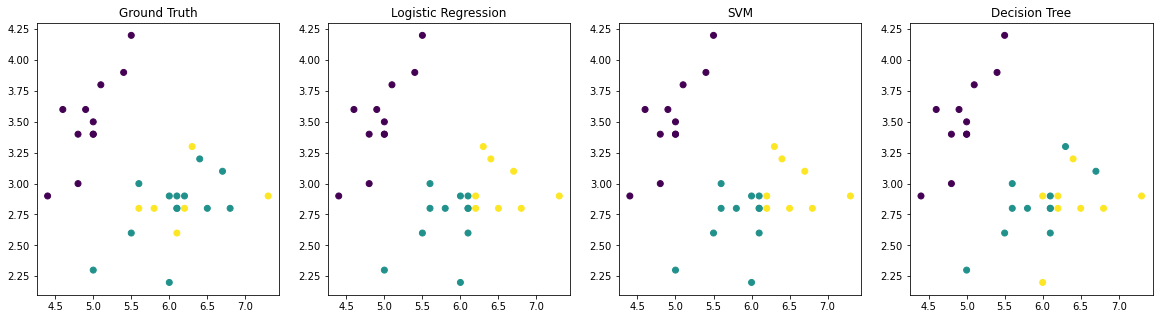

In [129]:
# Quiz: Can you draw four scatterplots for each model's predictions 
# and the true labels? (Example shown below)
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.title('Ground Truth')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

plt.subplot(142)
plt.title('Logistic Regression')
plt.scatter(X_test[:, 0], X_test[:, 1], c=logistic_Y)

plt.subplot(143)
plt.title('SVM')
plt.scatter(X_test[:, 0], X_test[:, 1], c=svm_Y)

plt.subplot(144)
plt.title('Decision Tree')
plt.scatter(X_test[:, 0], X_test[:, 1], c=tree_Y)

plt.show()

![Scatterplot](https://i.imgur.com/TDvaIWA.png)